In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris, load_breast_cancer
from sklearn.datasets import fetch_california_housing
from sklearn.datasets import load_iris, load_breast_cancer
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
%matplotlib inline 

In [2]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,  ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [3]:
#Read that data into Python and call the dataframe churnData.
df = pd.read_csv(r"C:\Users\Juliane\Documents\GitHub\labs_repo\Labs\LabsW7\DATA_Customer-Churn.csv")


In [4]:
#Check the datatypes of all the columns in the data. You will see that the column TotalCharges is object type. 
#Convert this column into numeric type using pd.to_numeric function.
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,Yes,No,No,No,No,Month-to-month,29.85,29.85,No
1,Male,0,No,No,34,Yes,Yes,No,Yes,No,No,No,One year,56.95,1889.5,No
2,Male,0,No,No,2,Yes,Yes,Yes,No,No,No,No,Month-to-month,53.85,108.15,Yes
3,Male,0,No,No,45,No,Yes,No,Yes,Yes,No,No,One year,42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,No,No,No,No,No,Month-to-month,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,No,Yes,Yes,Yes,Yes,One year,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,No,Yes,Yes,No,Yes,Yes,One year,103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,Yes,No,No,No,No,No,Month-to-month,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,No,No,No,No,No,No,Month-to-month,74.40,306.6,Yes


In [5]:
#pd.to_numeric(db.TotalCharges)

df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [6]:
#Check for null values in the dataframe. Replace the null values.   # MAYBE AGAIN WITH NEXT NEIGHBOUR
df.isna().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [7]:
df = df.fillna(df['TotalCharges'].mean())


In [8]:
df.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [9]:
df.head(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,Yes,No,No,No,No,Month-to-month,29.85,29.85,No
1,Male,0,No,No,34,Yes,Yes,No,Yes,No,No,No,One year,56.95,1889.50,No
2,Male,0,No,No,2,Yes,Yes,Yes,No,No,No,No,Month-to-month,53.85,108.15,Yes


In [10]:
#Use the following features: tenure, SeniorCitizen, MonthlyCharges and TotalCharges
X = df[['tenure', 'SeniorCitizen', 'MonthlyCharges', 'TotalCharges']]  # Define and put the features you want in X 
y = df['Churn']  # Target variable

# - Split the data into a training set and a test set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [11]:
y_train

2142     No
1623     No
6074    Yes
1362    Yes
6754     No
       ... 
3772    Yes
5191     No
5226     No
5390    Yes
860      No
Name: Churn, Length: 5634, dtype: object

In [12]:
# - Scale the features either by using normalizer or a standard scaler.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [16]:
#pt = PowerTransformer()
#pt.fit(X_train)
#X_train_log = pt.transform(X_train)
#X_test_log = pt.transform(X_test)
len(y_pred_test_log)

1409

In [15]:
# Fit a logistic regression model on the training data.

from sklearn.preprocessing import PowerTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

log_model = LogisticRegression(random_state=42)

log_model.fit(X_train_scaled, y_train)

#Predictions 
y_pred_train_log = log_model.predict(X_train_scaled)
y_pred_test_log = log_model.predict(X_test_scaled)

#Performance metrics with pos_label set to 'Yes'.
performance_log = pd.DataFrame({'Error_metric': ['Accuracy', 'Precision', 'Recall'],
                                'Train': [accuracy_score(y_train, y_pred_train_log),
                                          precision_score(y_train, y_pred_train_log, pos_label='Yes'),
                                          recall_score(y_train, y_pred_train_log, pos_label='Yes')],
                                'Test': [accuracy_score(y_test, y_pred_test_log),
                                         precision_score(y_test, y_pred_test_log, pos_label='Yes'),
                                         recall_score(y_test, y_pred_test_log, pos_label='Yes')]})

display(performance_log)

,Error_metric,Train,Test
0,Accuracy,0.787540,0.807665
1,Precision,0.645570,0.699219
2,Recall,0.443182,0.479893


In [17]:
# - Fit a Knn Classifier(NOT KnnRegressor please!)model on the training data.
model = KNeighborsClassifier(n_neighbors=5,weights='uniform') # declare we're using knn classification model
model.fit(X_train_scaled, y_train) # train model
y_pred = model.predict(X_test_scaled) # predict test
y_pred_train=model.predict(X_train_scaled) # predict train (for sanity checks)

# Calculate performance metrics with pos_label set to 'Yes'.
performance_log = pd.DataFrame({'Error_metric': ['Accuracy', 'Precision', 'Recall'],
                                'Train': [accuracy_score(y_train, y_pred_train_log),
                                          precision_score(y_train, y_pred_train_log, pos_label='Yes'),
                                          recall_score(y_train, y_pred_train_log, pos_label='Yes')],
                                'Test': [accuracy_score(y_test, y_pred_test_log),
                                         precision_score(y_test, y_pred_test_log, pos_label='Yes'),
                                         recall_score(y_test, y_pred_test_log, pos_label='Yes')]})

display(performance_log)

,Error_metric,Train,Test
0,Accuracy,0.787540,0.807665
1,Precision,0.645570,0.699219
2,Recall,0.443182,0.479893


In [18]:
len(y_pred)

1409

In [19]:
y_pred[0:5]

array(['No', 'No', 'No', 'Yes', 'No'], dtype=object)

In [20]:
y_test.head(5)

185     Yes
2715     No
3825     No
1807    Yes
132      No
Name: Churn, dtype: object

In [21]:
X_test

,tenure,SeniorCitizen,MonthlyCharges,TotalCharges
185,1,0,24.80,24.80
2715,41,0,25.25,996.45
3825,52,0,19.35,1031.70
1807,1,0,76.35,76.35
132,67,0,50.55,3260.10
...,...,...,...,...
6366,64,0,68.30,4378.80
315,51,0,110.05,5686.40
2439,17,0,19.90,329.75
5002,69,0,43.95,2960.10


In [22]:
y_test

185     Yes
2715     No
3825     No
1807    Yes
132      No
       ... 
6366     No
315      No
2439     No
5002     No
1161    Yes
Name: Churn, Length: 1409, dtype: object

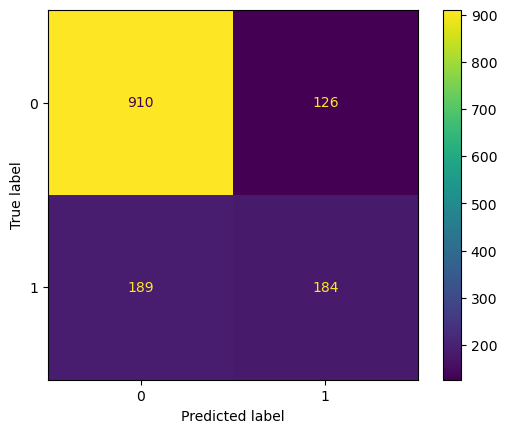

In [23]:
cm = confusion_matrix(y_test, y_pred, labels= model.classes_)
disp = ConfusionMatrixDisplay(cm)
disp.plot()